# 神经网络XO字符分类

## 载入数据

序列化文件转换为数据集对象

In [1]:
import pickle

dataset = None

with open('../../common/xo_dataset.bin', 'rb') as f:
    dataset = pickle.load(f)

In [2]:
# 训练集图像向量
X_train = dataset['X_train']
# 训练集标签
y_train = dataset['y_train']
# 测试集图像向量
X_test = dataset['X_test']
# 测试集标签
y_test = dataset['y_test']

## 数据预处理

In [3]:
import numpy as np

输入数据格式转换为float32

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

归一化，数据缩放在0-1之间

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Label转换为one-hot格式

In [6]:
from keras.utils import np_utils

NB_CLASSES = 2  # 输出的类的个数　(X or O)
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Using TensorFlow backend.


## 定义神经网络模型

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [11]:
# 输入向量的维度
RESHAPED = 784
# 每层隐藏层神经元的个数
N_HIDDEN = 128
# DROPOUT的比例
DROPOUT = 0.3

In [13]:
model = Sequential()
# 第一层隐藏层 全连接层
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
# Relu激活层
model.add(Activation('relu'))
# Dropout层，随机删除神经元
# 网络表现力强，而且可以防止过拟合
model.add(Dropout(DROPOUT))
# 第二层隐藏层 全连接层
model.add(Dense(N_HIDDEN))
# Relu激活层
model.add(Activation('relu'))
# Dropout层，随机删除神经元
model.add(Dropout(DROPOUT))
# 全连接层，两个神经元　与输出尺寸一致
model.add(Dense(NB_CLASSES))
# Softmax正规化
# 使得输出结果范围在0-1之间, 而且所有的输出层结果数值相加=1
# 相当于每个输出代表是这个类的概率
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
__________

## 训练模型

In [20]:
from keras.optimizers import RMSprop
#　当一个完整的数据集通过了神经网络一次并且返回了一次，这个过程称为一个 epoch。
NB_EPOCH = 20
# 当一个 epoch 对于计算机而言太庞大的时候，就需要把它分成多个小块，每个小块称之为一个batch
# BATCH_SIZE 是一个 batch 中的样本总数
BATCH_SIZE = 128
# optimizer参数优化器　效果比随机梯度下降(SGD)好
OPTIMIZER = RMSprop()

VERBOSE = 1
# 分隔验证数据比例
# 从训练数据选取20%作为验证数据
# 注: 调整超参数的时候，必须使用超参数专用的确认数据. 用于调整超参数的数据，一般称之为超参数
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [21]:
# 模型编译
# 损失函数为种类交叉熵　Categorical Crossentropy
# metrics 评价函数用于评估当前训练模型的性能 这里标准选用了准确率
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# 数据拟合，记录保存在history中
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# 模型评估，得分存在score里面
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Train on 7680 samples, validate on 1920 samples
Epoch 1/20
7680/7680 [==============================] - 1s 80us/step - loss: 0.0555 - acc: 0.9773 - val_loss: 0.0182 - val_acc: 0.9932
Epoch 2/20
7680/7680 [==============================] - 0s 48us/step - loss: 0.0178 - acc: 0.9935 - val_loss: 0.0100 - val_acc: 0.9969
Epoch 3/20
7680/7680 [==============================] - 0s 50us/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0112 - val_acc: 0.9974
Epoch 4/20
7680/7680 [==============================] - 0s 47us/step - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 5/20
7680/7680 [==============================] - 0s 43us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0086 - val_acc: 0.9979
Epoch 6/20
7680/7680 [==============================] - 0s 42us/step - loss: 0.0019 - acc: 0.9992 - val_loss: 0.0111 - val_acc: 0.9979
Epoch 7/20
7680/7680 [==============================] - 0s 43us/step - loss: 0.0019 - acc: 0.9992 - val_loss: 0.0114 - val_acc: 0.9979
Epoch 8

## 模型训练可视化

可视化训练结果的目的，主要是为了观察超参数，模型是否产生了过拟合的现象

In [31]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


历史记录里面有四个指标
* `acc` 测试集的准确率
* `val_acc` 验证集的准确率
* `loss` 训练集上的loss
* `val_loss` 验证机上的loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


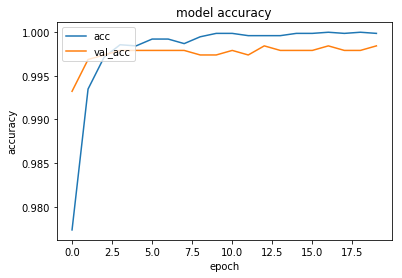

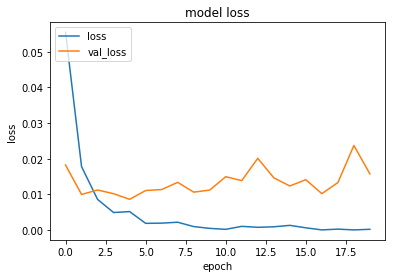

In [29]:
import matplotlib.pyplot as plt


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

## 超参数调优

超参数就是人为预先设定的参数，例如：
1. EPOCH的大小
2. BATCH的大小
3. 隐藏层神经元的个数
4. 隐藏层的层数
5. 优化器的选择
6. DROPOUT的比例
等等．

超参数优化就是尝试不同的超参数组合，找到得分最高的那个．

In [49]:
NB_EPOCH = 3
BATCH_SIZE = 135

In [50]:
# 模型编译
# 损失函数为种类交叉熵　Categorical Crossentropy
# metrics 评价函数用于评估当前训练模型的性能 这里标准选用了准确率
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# 数据拟合，记录保存在history中
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# 模型评估，得分存在score里面
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 7680 samples, validate on 1920 samples
Epoch 1/3
7680/7680 [==============================] - 1s 100us/step - loss: 9.4463e-07 - acc: 1.0000 - val_loss: 0.0157 - val_acc: 0.9990
Epoch 2/3
7680/7680 [==============================] - 0s 45us/step - loss: 1.1925e-07 - acc: 1.0000 - val_loss: 0.0158 - val_acc: 0.9990
Epoch 3/3
1600/1600 [==============================] - 0s 51us/step

Test score: 0.047438159837622604
Test accuracy: 0.99625


微调后，虽然测试集上的准确率没有发生太大变化，还是`0.99625`, 但是大幅度降低了训练次数还有训练时间．

## 模型序列化

In [51]:
with open('../../common/nn_model.bin', 'wb') as f:
    pickle.dump(model, f)

## Reference

Keras深度学习实战, Antonio Gulli, Sujit Pal

[神经网络训练中，傻傻分不清Epoch、Batch Size和迭代](https://www.jiqizhixin.com/articles/2017-09-25-3
)

[keras深度学习框架输出acc/loss,val_acc/val_loss，什么意思？](https://www.zhihu.com/question/58200419)